### https://www.kaggle.com/c/nfl-big-data-bowl-2022/data

In [ ]:
import zipfile
with zipfile.ZipFile("./data/nfl-big-data-bowl-2022.zip", 'r') as zip_ref:
    zip_ref.extractall('./data/')



In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/tracking2019.csv
./data/tracking2018.csv
./data/PFFScoutingData.csv
./data/plays.csv
./data/tracking2020.csv
./data/players.csv
./data/games.csv
./data/nfl-big-data-bowl-2022.zip


In [6]:
data_track_2019 = pd.read_csv('./data/tracking2019.csv')
data_track_2018 = pd.read_csv('./data/tracking2018.csv')
data_track_2020 = pd.read_csv('./data/tracking2020.csv')

data_PFFScouting = pd.read_csv('./data/PFFScoutingData.csv')
data_plays = pd.read_csv('./data/plays.csv')
data_players = pd.read_csv('./data/players.csv')
data_games = pd.read_csv('./data/games.csv')


In [7]:
data_track_2018.head(2)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right


In [8]:
data_track_2019.head(2)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2019-12-29T21:25:27.400,68.39,20.20,0.16,0.31,0.02,320.08,322.40,None,36060.0,Anthony Levine,41.0,DB,home,1,2019122900,36,right
1,2019-12-29T21:25:27.500,68.38,20.21,0.16,0.28,0.02,321.66,309.87,None,36060.0,Anthony Levine,41.0,DB,home,2,2019122900,36,right


In [9]:
data_track_2020.head(2)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,40,left
1,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,40,left


In [10]:
data_PFFScouting.head(2)

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC


In [11]:
data_plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [12]:
data_players.head(2)

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier


In [13]:
data_games.head(2)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF


In [14]:
def resumetable(df):
    print(f'Shape : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Num of null'] = df.isnull().sum().values
    summary['Num of unique'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    return summary



In [15]:
resumetable(data_track_2018)

Shape : (12777351, 18)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,time,object,0,525791,2018-12-30T21:25:32.200,2018-12-30T21:25:32.300,2018-12-30T21:25:32.400
1,x,float64,0,15176,41.32,41.68,42.05
2,y,float64,0,7090,29.45,29.17,28.88
3,s,float64,0,3634,4.36,4.59,4.74
4,a,float64,0,3139,1.33,1.24,0.99
5,dis,float64,0,965,0.43,0.45,0.47
6,o,float64,555537,36001,130.42,128.59,124.47
7,dir,float64,555537,36001,128.44,127.81,128.15
8,event,object,0,58,None,None,None
9,nflId,float64,555537,1769,39470.00,39470.00,39470.00


In [16]:
resumetable(data_track_2019)

Shape : (12170933, 18)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,time,object,0,503058,2019-12-29T21:25:27.400,2019-12-29T21:25:27.500,2019-12-29T21:25:27.600
1,x,float64,0,15052,68.39,68.38,68.36
2,y,float64,0,7010,20.20,20.21,20.23
3,s,float64,0,3729,0.16,0.16,0.20
4,a,float64,0,3601,0.31,0.28,0.25
5,dis,float64,0,916,0.02,0.02,0.02
6,o,float64,529171,36001,320.08,321.66,320.67
7,dir,float64,529171,36001,322.40,309.87,301.01
8,event,object,0,59,None,None,None
9,nflId,float64,529171,1792,36060.00,36060.00,36060.00


In [17]:
resumetable(data_track_2020)

Shape : (11821701, 18)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,time,object,0,490292,2021-01-03T18:03:02.200,2021-01-03T18:03:02.300,2021-01-03T18:03:02.400
1,x,float64,0,15028,61.21,61.22,61.23
2,y,float64,0,7236,46.77,46.77,46.76
3,s,float64,0,3663,0.08,0.11,0.10
4,a,float64,0,3331,0.13,0.19,0.18
5,dis,float64,0,871,0.01,0.01,0.01
6,o,float64,513987,36001,186.21,184.87,183.38
7,dir,float64,513987,36001,144.73,126.09,108.95
8,event,object,0,57,None,None,None
9,nflId,float64,513987,1878,42901.00,42901.00,42901.00


In [18]:
resumetable(data_PFFScouting)

Shape : (19979, 20)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,gameId,int64,0,764,2018090600,2018090600,2018090600
1,playId,int64,0,4435,37,366,658
2,snapDetail,object,14060,5,NaN,OK,NaN
3,snapTime,float64,14061,58,NaN,0.84,NaN
4,operationTime,float64,14061,97,NaN,2.12,NaN
5,hangTime,float64,6881,296,3.85,4.46,NaN
6,kickType,object,6256,11,D,N,NaN
7,kickDirectionIntended,object,6278,3,R,C,NaN
8,kickDirectionActual,object,6278,3,R,C,NaN
9,returnDirectionIntended,object,15225,3,NaN,C,NaN


In [19]:
resumetable(data_plays)

Shape : (19979, 25)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,gameId,int64,0,764,2018090600,2018090600,2018090600
1,playId,int64,0,4435,37,366,658
2,playDescription,object,0,12355,J.Elliott kicks 65 yards from PHI 35 to end zo...,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...","(5:03) M.Bryant 21 yard field goal is GOOD, Ce..."
3,quarter,int64,0,5,1,1,1
4,down,int64,0,5,0,4,4
5,yardsToGo,int64,0,38,0,4,3
6,possessionTeam,object,0,33,PHI,PHI,ATL
7,specialTeamsPlayType,object,0,4,Kickoff,Punt,Field Goal
8,specialTeamsResult,object,0,12,Touchback,Return,Kick Attempt Good
9,kickerId,float64,101,111,44966.0,45603.0,27091.0


In [20]:
def write_percent(ax, total_size):
    '''Traverse the figure object and display the ratio at the top of the bar graph.'''
    for patch in ax.patches:
        height = patch.get_height() # Figure height (number of data)
        width = patch.get_width() # Figure width
        left_coord = patch.get_x() # The x-axis position on the left edge of the figure
        percent = height/total_size*100 # percent
        
        # Type text in the (x, y) coordinates
        ax.text(x=left_coord + width/2.0, # x-axis position
                y=height + total_size*0.001, # y-axis position
                s=f'{percent:1.1f}%', # Text
                ha='center') # in the middle

In [21]:
data_games['month'] = data_games['gameDate'].apply(lambda x: int(x.split('/')[0]))
data_games['day'] = data_games['gameDate'].apply(lambda x: int(x.split('/')[1]))
data_games['hour'] = data_games['gameTimeEastern'].apply(lambda x: int(x.split(':')[0]))


In [22]:
data_games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,month,day,hour
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6,20
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9,13
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9,13
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9,13
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9,13
...,...,...,...,...,...,...,...,...,...,...
759,2021010311,2020,17,01/03/2021,16:25:00,DEN,LV,1,3,16
760,2021010312,2020,17,01/03/2021,16:25:00,HOU,TEN,1,3,16
761,2021010313,2020,17,01/03/2021,16:25:00,IND,JAX,1,3,16
762,2021010314,2020,17,01/03/2021,16:25:00,LA,ARI,1,3,16


In [23]:
resumetable(data_games)

Shape : (764, 10)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,gameId,int64,0,764,2018090600,2018090900,2018090901
1,season,int64,0,3,2018,2018,2018
2,week,int64,0,17,1,1,1
3,gameDate,object,0,151,09/06/2018,09/09/2018,09/09/2018
4,gameTimeEastern,object,0,16,20:20:00,13:00:00,13:00:00
5,homeTeamAbbr,object,0,33,PHI,BAL,CLE
6,visitorTeamAbbr,object,0,33,ATL,BUF,PIT
7,month,int64,0,5,9,9,9
8,day,int64,0,31,6,9,9
9,hour,int64,0,10,20,13,13


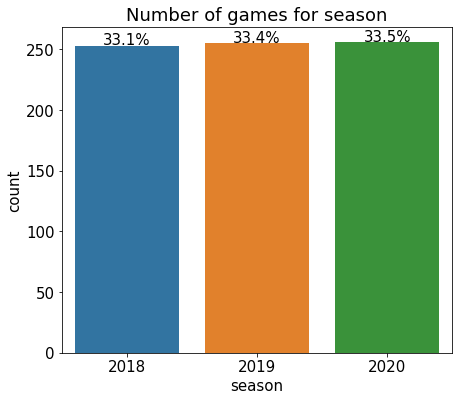

In [24]:
mpl.rc('font', size=15) 
plt.figure(figsize=(7, 6)) 

ax = sns.countplot(x='season', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for season');

### As the years go by, the number of games increases


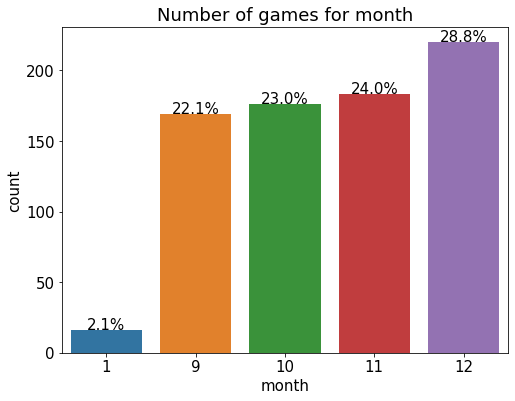

In [25]:
mpl.rc('font', size=15)
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='month', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for month');

#### The game was held from September to January. There are especially many games in December, and they are rarely held in January

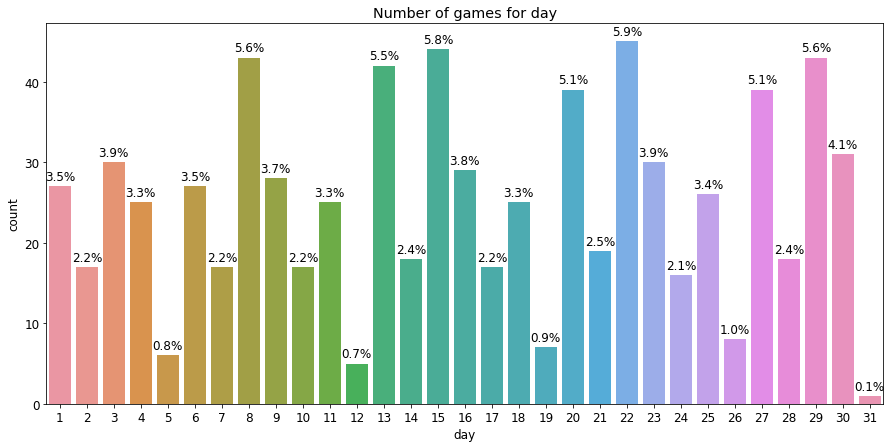

In [26]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='day', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for day');

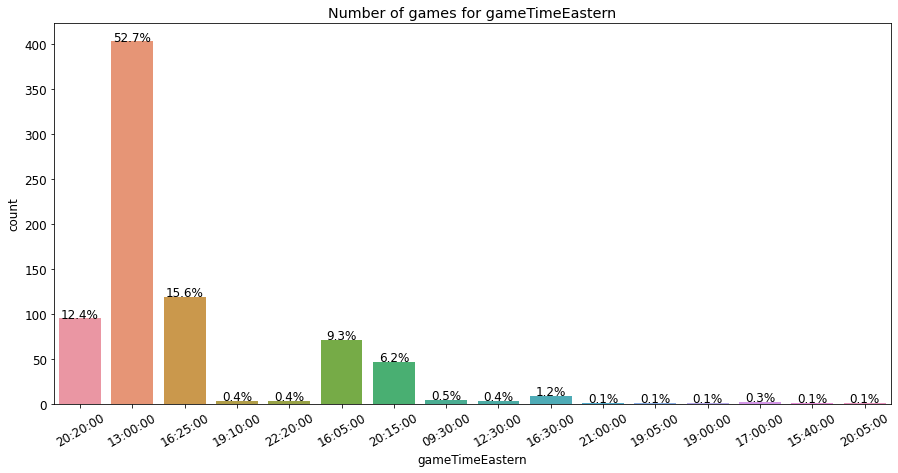

In [27]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='gameTimeEastern', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for gameTimeEastern');
ax.tick_params('x', labelrotation=30) # rotate 30 degree of x label

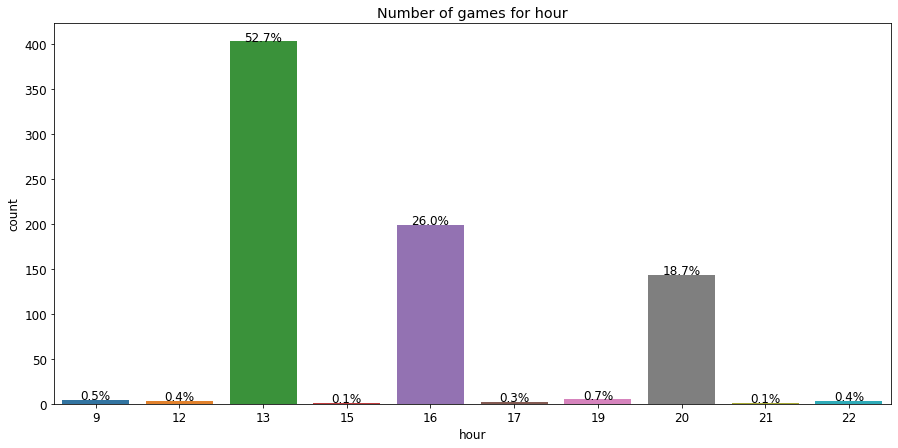

In [28]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='hour', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for hour');

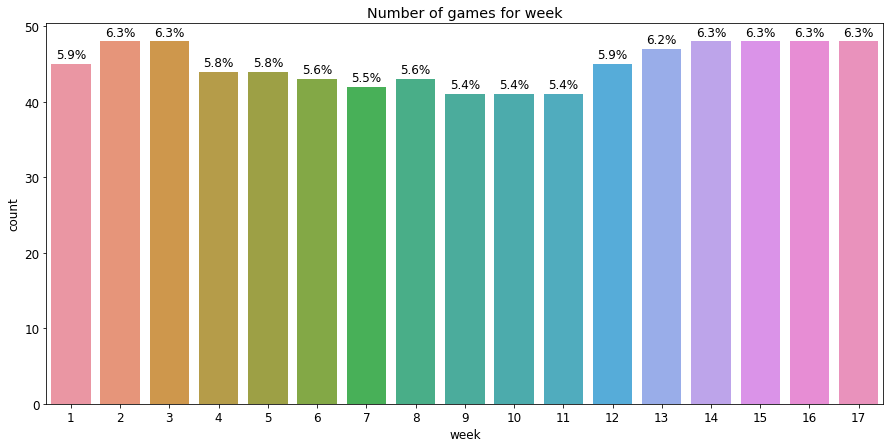

In [29]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='week', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for week');


Player data: The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId
nflId: Player identification number, unique across players (numeric)

height: Player height (text)

weight: Player weight (numeric)

birthDate: Date of birth (YYYY-MM-DD)

collegeName: Player college (text)

position: Player position (text)

displayName: Player name (text)

In [30]:
resumetable(data_players)


Shape : (2732, 7)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,nflId,int64,0,2732,42901,43501,43534
1,height,object,0,30,6-1,6-0,6-0
2,weight,int64,0,187,208,220,205
3,birthDate,object,17,2035,1992-07-25,1994-08-11,1993-06-02
4,collegeName,object,8,322,James Madison,Central Michigan,Illinois
5,Position,object,0,26,SS,FS,SS
6,displayName,object,0,2718,Dean Marlowe,Kavon Frazier,Clayton Fejedelem


In [39]:
check = data_players['height'].str.split('-', expand=True)

check.columns = ['first', 'second']

check.loc[(check['second'].notnull()), 'first'] = check[check['second'].notnull()]['first'].astype(np.int16) * 12 + check[check['second'].notnull()]['second'].astype(np.int16)

In [40]:
check

,first,second
0,73,1
1,72,0
2,72,0
3,73,1
4,73,1
...,...,...
2727,75,3
2728,75,3
2729,69,9
2730,73,None


In [41]:
data_players['height'] = check['first']
data_players['height'] = data_players['height'].astype(np.float32)
data_players['height'] /= 12

data_players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6.083333,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6.000000,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6.000000,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6.083333,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6.083333,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6.250000,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6.250000,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5.750000,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,6.083333,230,1992-10-20,LSU,RB,Jeremy Hill


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


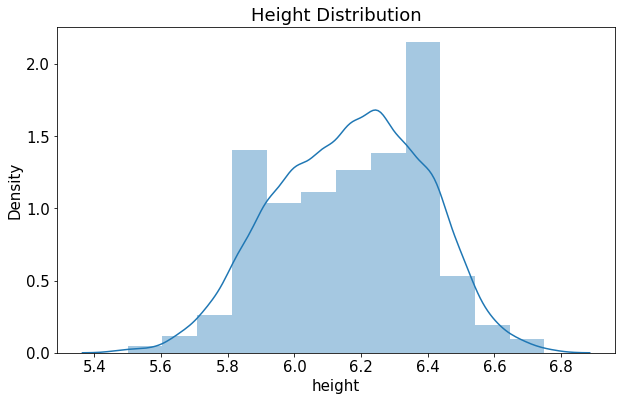

In [42]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 6))

ax = sns.distplot(data_players['height'], bins=12)
ax.set_title('Height Distribution');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


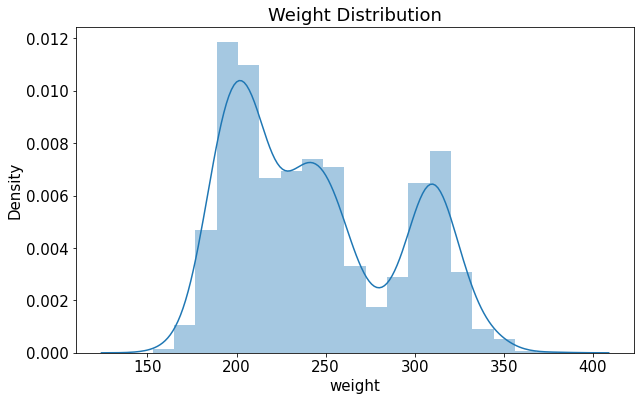

In [43]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 6))

ax = sns.distplot(data_players['weight'])
ax.set_title('Weight Distribution');

In [44]:
top_players_colleage = data_players['collegeName'].value_counts()[:20].reset_index()
top_players_colleage.columns = ['collageName', 'numberOfPlayers']
top_players_colleage

,collageName,numberOfPlayers
0,Alabama,69
1,Ohio State,56
2,Florida,55
3,Louisiana State,52
4,Georgia,47
5,Penn State,45
6,Miami,45
7,Michigan,45
8,Notre Dame,44
9,Clemson,44


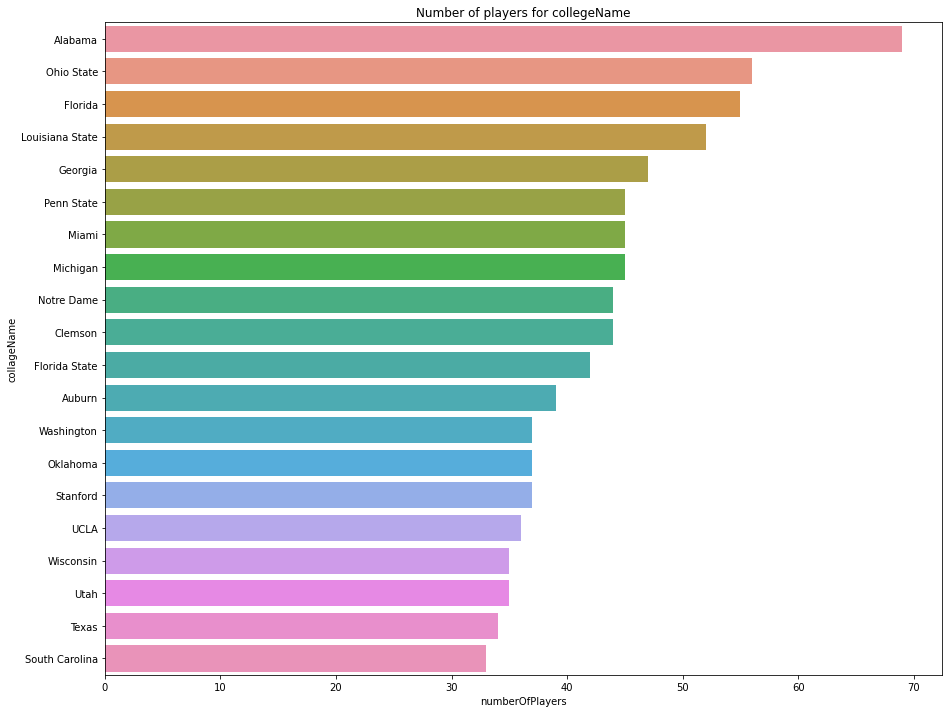

In [45]:
mpl.rc('font', size=10) 
plt.figure(figsize=(15, 12))

ax = sns.barplot(x='numberOfPlayers', y='collageName', data=top_players_colleage)
ax.set_title('Number of players for collegeName');

In [47]:
data_players['birthYear'] = 0
data_players

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear
0,42901,6.083333,208,1992-07-25,James Madison,SS,Dean Marlowe,0
1,43501,6.000000,220,1994-08-11,Central Michigan,FS,Kavon Frazier,0
2,43534,6.000000,205,1993-06-02,Illinois,SS,Clayton Fejedelem,0
3,43535,6.083333,235,1992-12-22,Temple,MLB,Tyler Matakevich,0
4,44174,6.083333,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,0
...,...,...,...,...,...,...,...,...
2727,33216,6.250000,320,06/16/1986,Central Florida,G,Josh Sitton,0
2728,33184,6.250000,265,05/02/1985,Winston-Salem State,DE,William Hayes,0
2729,45651,5.750000,198,06/16/1993,Iowa,WR,Riley McCarron,0
2730,41284,6.083333,230,1992-10-20,LSU,RB,Jeremy Hill,0


In [48]:
data_players.dropna(subset=['birthDate'], inplace=True)


In [52]:
for idx, row in data_players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # ex) 05/17/1994 
        data_players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]
        
    elif len(row['birthDate'].split('-')) == 3: # ex) 1995-05-05
        data_players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]

In [53]:
 data_players

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear
0,42901,6.083333,208,1992-07-25,James Madison,SS,Dean Marlowe,1992
1,43501,6.000000,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994
2,43534,6.000000,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993
3,43535,6.083333,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992
4,44174,6.083333,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993
...,...,...,...,...,...,...,...,...
2727,33216,6.250000,320,06/16/1986,Central Florida,G,Josh Sitton,1986
2728,33184,6.250000,265,05/02/1985,Winston-Salem State,DE,William Hayes,1985
2729,45651,5.750000,198,06/16/1993,Iowa,WR,Riley McCarron,1993
2730,41284,6.083333,230,1992-10-20,LSU,RB,Jeremy Hill,1992


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


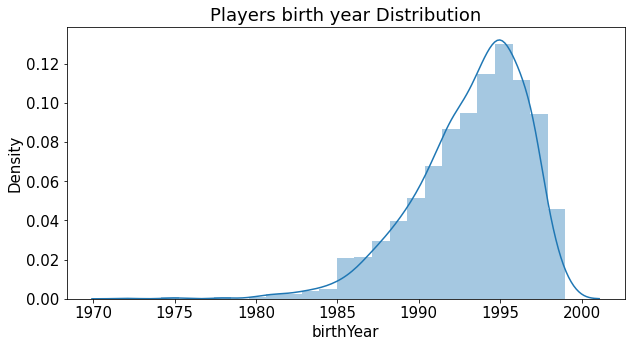

In [55]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_players['birthYear'], bins=25)
ax.set_title('Players birth year Distribution');

In [57]:

data_players['birthYear'].min(), data_players['birthYear'].max()


('1972', '1999')

### Play data: The plays.csv file contains play-level information from each game. The key variables are gameId and playId

gameId: Game identifier, unique (numeric)

playId: Play identifier, not unique across games (numeric)

playDescription: Description of play (text)

quarter: Game quarter (numeric)

down: Down (numeric)

yardsToGo: Distance needed for a first down (numeric)

possessionTeam: Team punting, placekicking or kicking off the ball (text)

specialTeamsPlayType: Formation of play: Extra Point, Field Goal, Kickoff or Punt (text)

specialTeamsPlayResult: Special Teams outcome of play dependent on play type: Blocked Kick Attempt, Blocked Punt, Downed, Fair Catch, Kick Attempt Good, Kick Attempt No Good, Kickoff Team Recovery, Muffed, Non-Special Teams Result, Out of Bounds, Return or Touchback (text)

kickerId: nflId of placekicker, punter or kickoff specialist on play (numeric)

returnerId: nflId(s) of returner(s) on play if there was a special teams return. Multiple returners on a play are separated by a ; (text)

kickBlockerId: nflId of blocker of kick on play if there was a blocked field goal or blocked punt (numeric)
yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)

yardlineNumber: Yard line at line-of-scrimmage (numeric)
gameClock: Time on clock of play (MM:SS)
penaltyCodes: NFL categorization of the penalties that occurred on the play. Multiple penalties on a play are separated by a ; (text)
penaltyJerseyNumber: Jersey number and team code of the player committing each penalty. Multiple penalties on a play are separated by a ; (text)

penaltyYards: yards gained by possessionTeam by penalty (numeric)
preSnapHomeScore: Home score prior to the play (numeric)
preSnapVisitorScore: Visiting team score prior to the play (numeric)
passResult: Scrimmage outcome of the play if specialTeamsPlayResult is "Non-Special Teams Result" (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, ' ': Designed Rush, text)

kickLength: Kick length in air of kickoff, field goal or punt (numeric)

kickReturnYardage: Yards gained by return team if there was a return on a kickoff or punt (numeric)

playResult: Net yards gained by the kicking team, including penalty yardage (numeric)

absoluteYardlineNumber: Location of ball downfield in tracking data coordinates (numeric)

In [59]:
data_plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,02:20:00,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,01:49:00,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,NaN,NaN,SEA,15,00:23:00,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


In [60]:
resumetable(data_plays)


Shape : (19979, 25)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,gameId,int64,0,764,2018090600,2018090600,2018090600
1,playId,int64,0,4435,37,366,658
2,playDescription,object,0,12355,J.Elliott kicks 65 yards from PHI 35 to end zo...,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...","(5:03) M.Bryant 21 yard field goal is GOOD, Ce..."
3,quarter,int64,0,5,1,1,1
4,down,int64,0,5,0,4,4
5,yardsToGo,int64,0,38,0,4,3
6,possessionTeam,object,0,33,PHI,PHI,ATL
7,specialTeamsPlayType,object,0,4,Kickoff,Punt,Field Goal
8,specialTeamsResult,object,0,12,Touchback,Return,Kick Attempt Good
9,kickerId,float64,101,111,44966.0,45603.0,27091.0


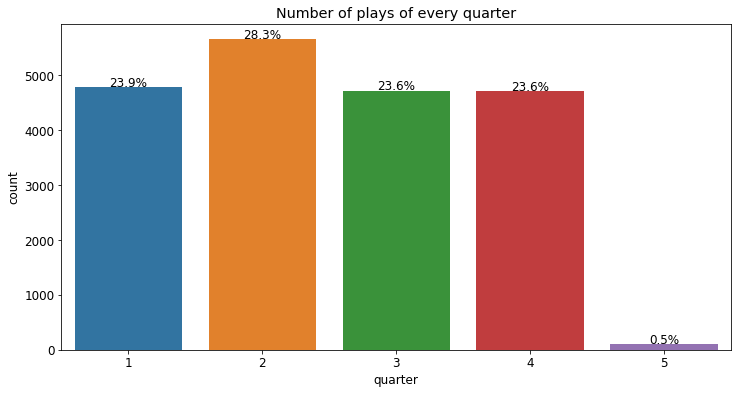

In [71]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='quarter', data=data_plays)
write_percent(ax, len(data_plays))
ax.set_title('Number of plays of every quarter');

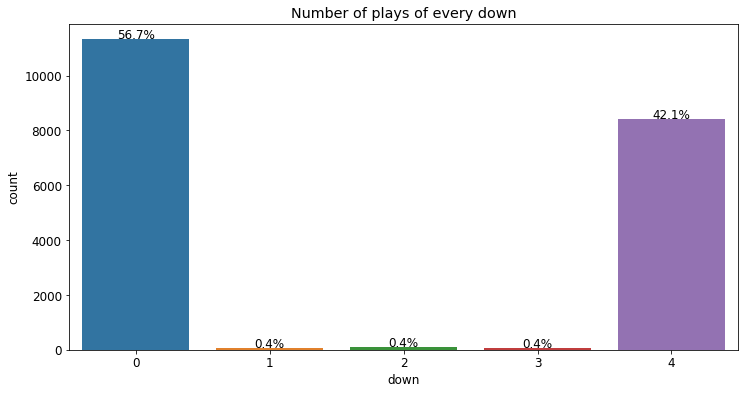

In [70]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='down', data=data_plays)
write_percent(ax, len(data_plays))
ax.set_title('Number of plays of every down');

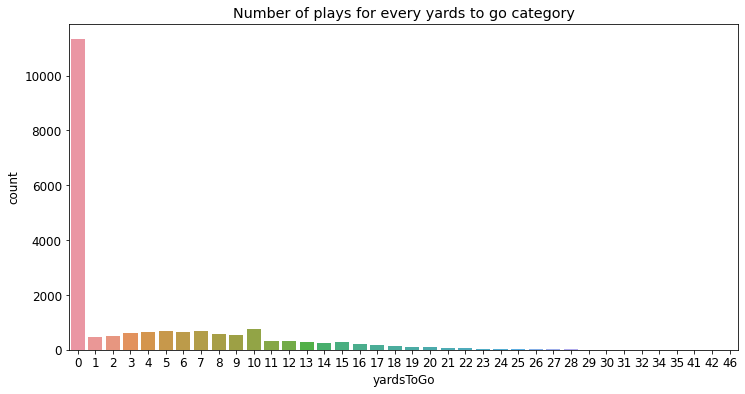

In [73]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='yardsToGo', data=data_plays)
ax.set_title('Number of plays for every yards to go category');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'playResult Distribution')

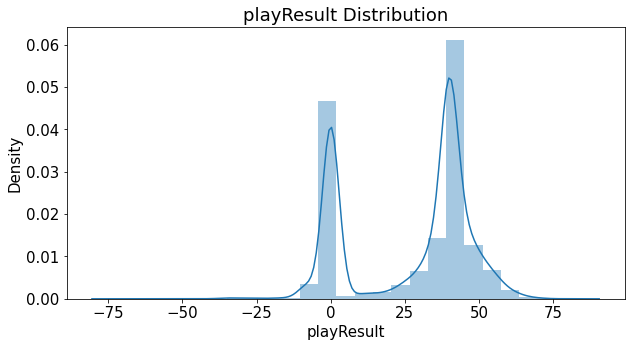

In [74]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_plays['playResult'], bins=25);
ax.set_title('playResult Distribution')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


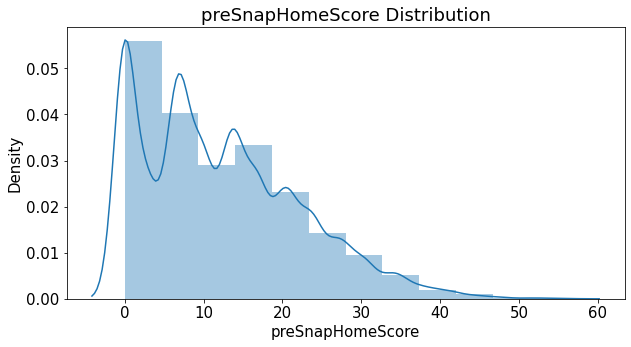

In [76]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_plays['preSnapHomeScore'], bins=12);
ax.set_title('preSnapHomeScore Distribution'); 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


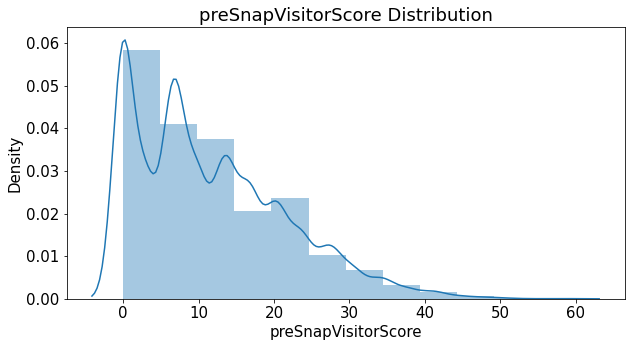

In [78]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_plays['preSnapVisitorScore'], bins=12);
ax.set_title('preSnapVisitorScore Distribution'); 

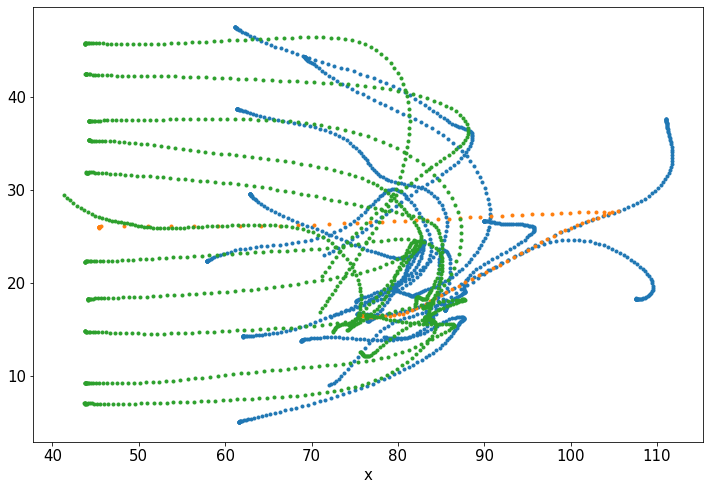

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
data_track_2018.query('gameId == 2018123000 and playId == 36').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove()